# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-07-27 18:05:48.426546: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-27 18:05:48.432416: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-27 18:05:48.535111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-27 18:05:50.735977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/S-curve/Base_Line_Scores(N7172)_AP(0.05-0.1-0.15-0.2-0.3-0.5)_47.npy
###tma.clear_directory(text_curater="average") #, not_text=[]

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

'Clear Directory'

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split= "random", percent_of_anchors= [0.2], verbose=2, random_state= 1738)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
##test.run_SPUD_tests()
#test.run_DIG_tests(predict = False, page_ranks=["None"])
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)
#test.run_CSPUD_tests(operations= ["log", "sqrt", "normalize"])


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 3)
Split B Features shape (150, 1)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [4]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Fix DataFrame if it was bad values
df = df[~(df["Percent_of_Anchors"].astype(float) > 0.5)]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

In [5]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [6]:
subset_df(df, seed = 42)#.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,t_value,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
458183,ecoli_5,NAMA,42,skewed,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914373,0.914373,NaN
987806,iris,CwDIG,42,random,2.0,0.01,0.50,None,-1.0,NaN,10,NaN,0.063778,0.760000,0.840000,0.920000,0.696222
987807,iris,CwDIG,42,random,6.0,0.03,0.50,None,-1.0,NaN,10,NaN,0.079356,0.786667,0.893333,0.906667,0.707311
987808,iris,CwDIG,42,random,10.0,0.05,0.50,None,-1.0,NaN,10,NaN,0.088778,0.826667,0.880000,0.900000,0.737889
987809,iris,CwDIG,42,random,14.0,0.07,0.50,None,-1.0,NaN,10,NaN,0.078289,0.793333,0.880000,0.900000,0.715044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267627,S-curve,SSMA,42,even,47.0,0.19,0.05,NaN,NaN,NaN,NaN,NaN,0.352290,0.328571,NaN,NaN,-0.023719
1267628,S-curve,SSMA,42,even,47.0,0.19,0.10,NaN,NaN,NaN,NaN,NaN,0.433368,0.340909,NaN,NaN,-0.092459
1267629,S-curve,SSMA,42,even,47.0,0.19,0.15,NaN,NaN,NaN,NaN,NaN,0.309584,0.456522,NaN,NaN,0.146938
1267630,S-curve,SSMA,42,even,47.0,0.19,0.20,NaN,NaN,NaN,NaN,NaN,0.300868,0.412500,NaN,NaN,0.111632


In [7]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 1274490


 Method        Lengths
--------      ----------
 JLMA:          71090
 CwDIG:          329090
 MAGAN:          4784
 SSMA:          57250
 DTA:          73210
 Nama:          5456
 SPUD:          367690
 DIG:          311500


----------------------       Splits      ----------------------
Total data of random: 354986

 random        Lengths
--------      ----------
 MAGAN:          1248
 SSMA:          12960
 CwDIG:          98690
 JLMA:          12960
 DTA:          12960
 Nama:          1248
 SPUD:          114420
 DIG:          87540


Total data of even: 237730

 even        Lengths
--------      ----------
 MAGAN:          1362
 SSMA:          15090
 CwDIG:          73200
 JLMA:          14210
 DTA:          15050
 Nama:          1458
 SPUD:          56600
 DIG:   

In [8]:
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values

/tmp/ipykernel_2615689/2174829191.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(


array([  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515])

In [9]:
grouped#["method_count", "seeds"]

,seed,csv_count,method_count
0,42,1,1
1,1738,26,9
2,1825,29,9
3,2830,26,9
4,3407,26,9
5,3430,26,9
6,5198,26,9
7,7667,26,9
8,9515,26,9


# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

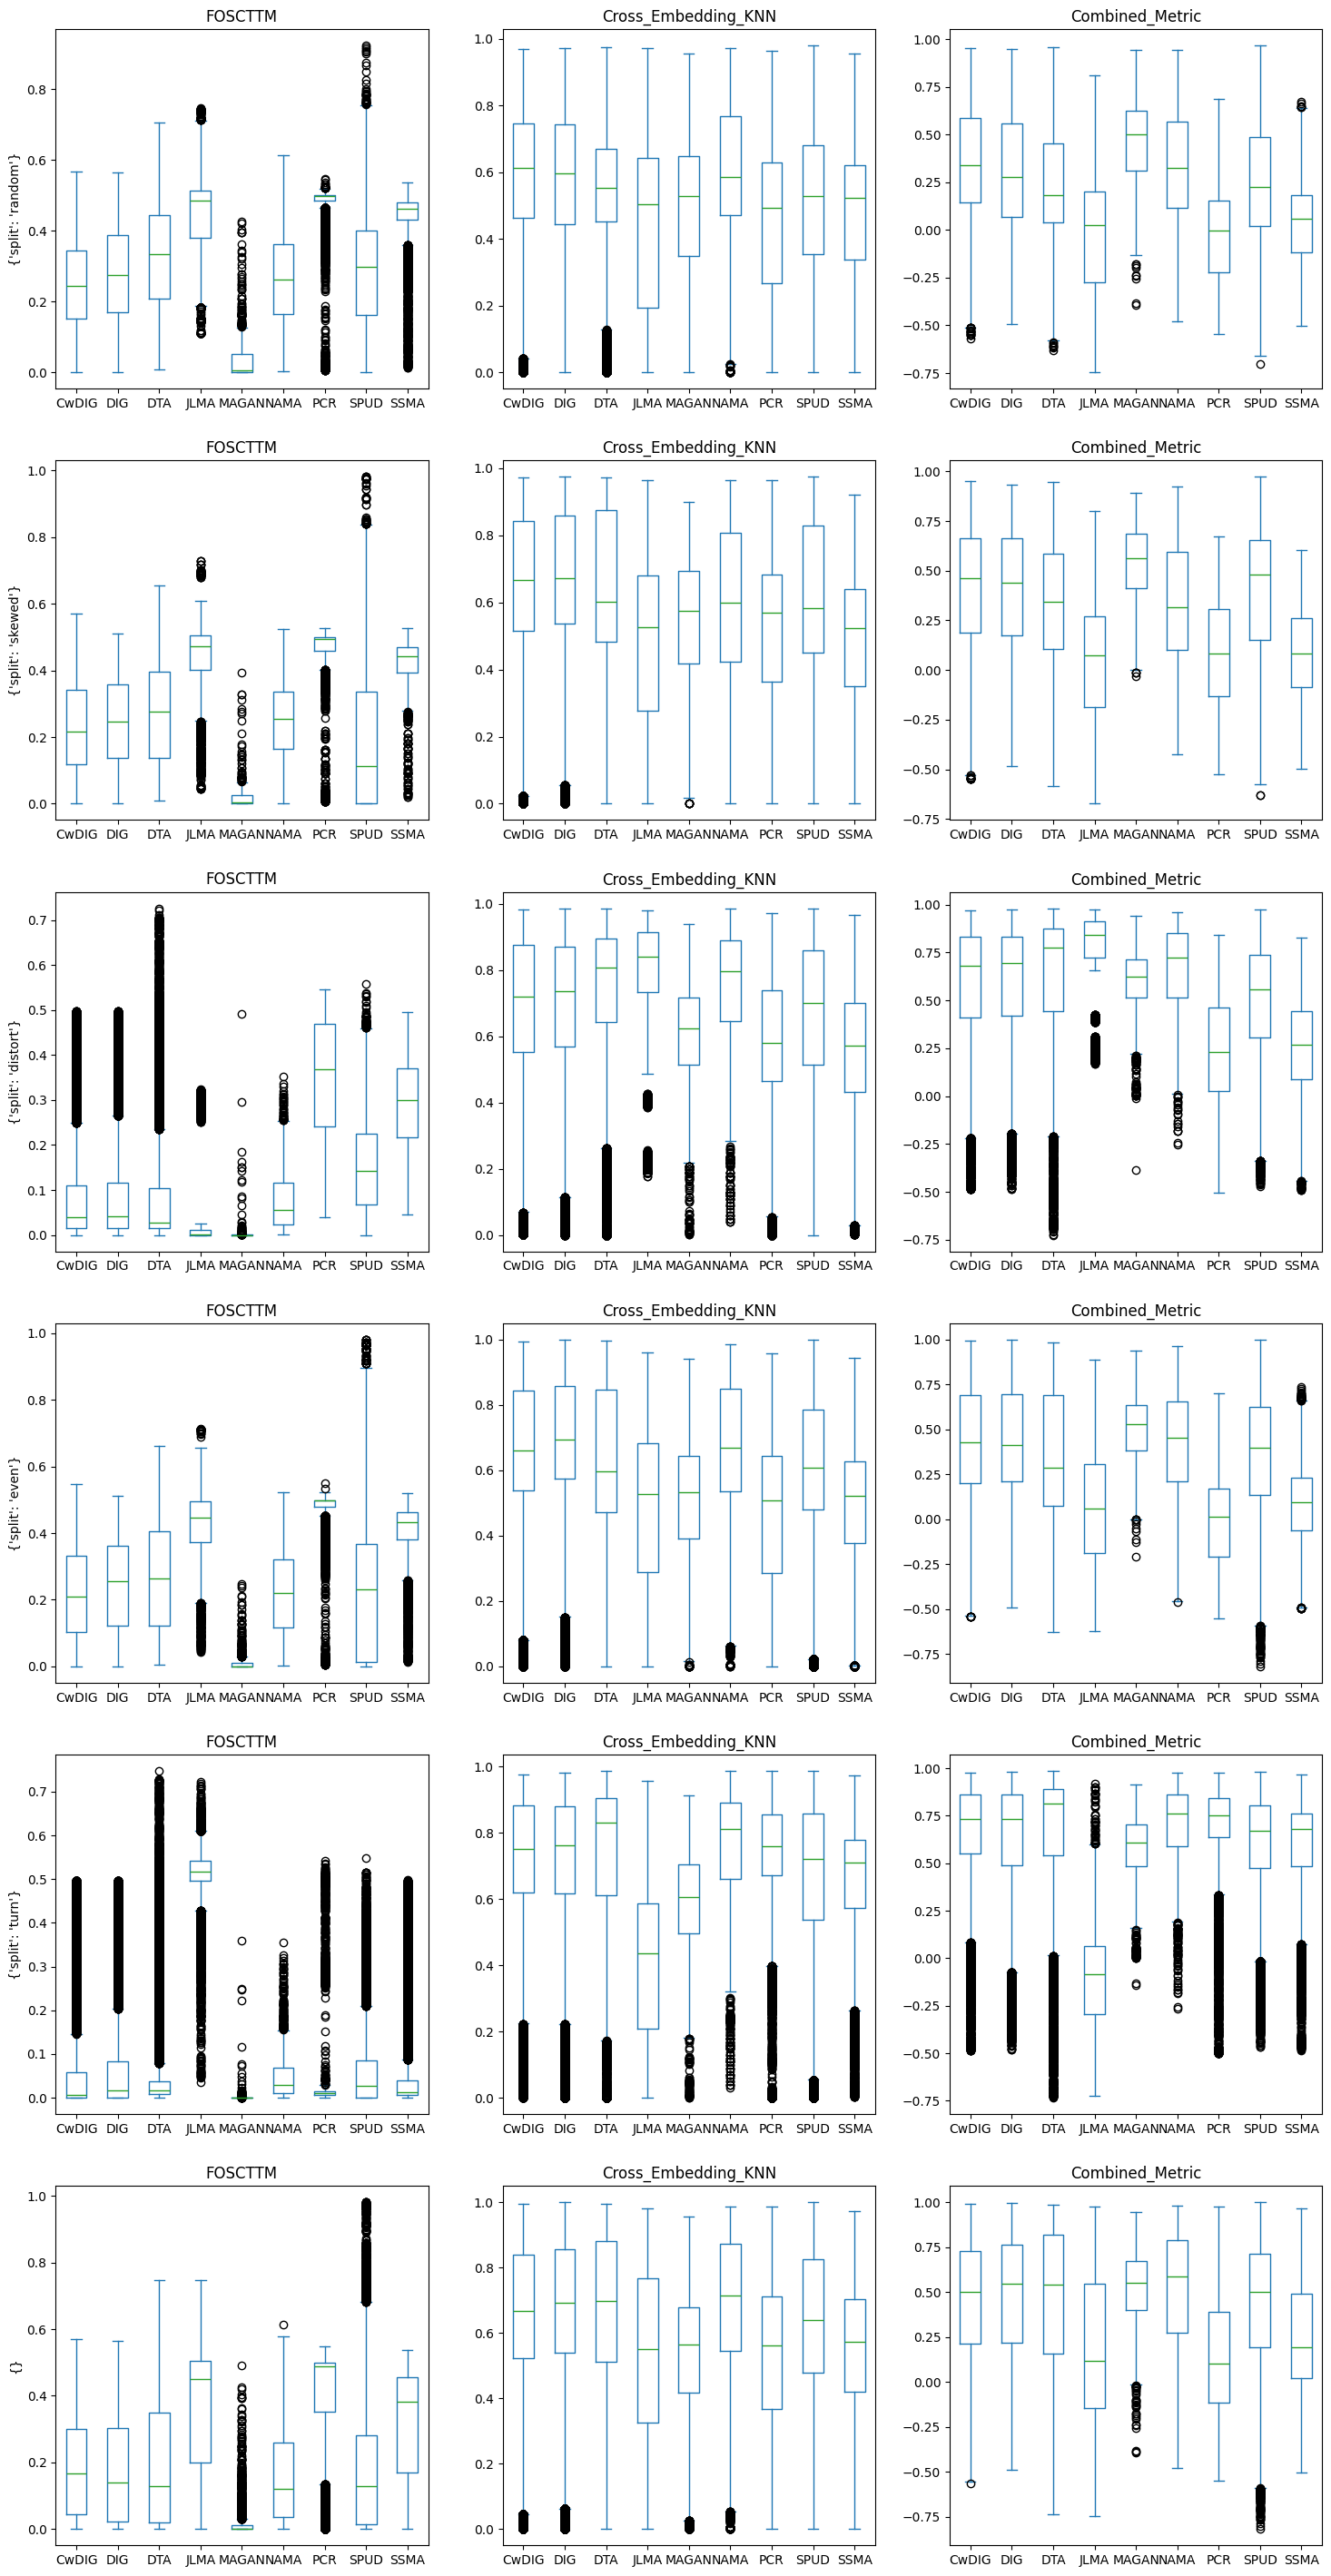

In [10]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         },
         {}]

plot_in_fig(df = df, columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [11]:
def plt_methods_by_CSV_max(df = df, sort_by = "DIG", metric = "Combined_Metric", return_df =False, plot_methods = ["SSMA", "MAGAN", "DTA", "SPUD_D", "SPUD_M", "DIG", "CwDIG", "NAMA", "PCR", "JLMA", "Split_A", "Split_B"]):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    if metric == "FOSCTTM": #Because for the FOSCTTM the smaller score is better
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].min(),
            'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].min(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].min(),
            'SPUD_D': df[df["SPUDS_Algorithm"]== "distance"].groupby("csv_file")[metric].min(),
            'SPUD': df[df["SPUDS_Algorithm"] == "merge"].groupby("csv_file")[metric].min(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].min(),
            'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].min(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].min(),
            'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].min(),
            'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].min(),
            'Split_A': df.groupby("csv_file")["A_Classification_Score"].min(),
            'Split_B': df.groupby("csv_file")["B_Classification_Score"].min()
        })
    else:
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
            'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
            'SPUD_D': df[df["SPUDS_Algorithm"]== "distance"].groupby("csv_file")[metric].max(),
            'SPUD': df[df["SPUDS_Algorithm"] == "merge"].groupby("csv_file")[metric].max(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
            'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].max(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
            'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].max(),
            'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
            'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
            'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
        })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index - 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }

    plt.figure(figsize=(16, 6))
    
    if "DIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "MASH", **key_words)
    if "MAGAN" in plot_methods:
        ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', label = "MAGAN", **key_words)
    if "JLMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["JLMA"], marker = '_', label = "JLMA", **key_words)
    if "SPUD_D" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD_D"], label = "SPUD_D", **key_words)
    if "Split_A" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index + 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }
    if "CwDIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["CwDIG"], marker = '^', label = "MASH-", **key_words)
    if "NAMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    if "PCR" in plot_methods:
        ax = plt.scatter(y = agregate_df["PCR"], marker = 'v', label = "Procrutees", **key_words)
    if "DTA" in plot_methods:
        ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    if "SPUD" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words)
    if "SSMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words) 
    if "Split_B" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_B"], marker = '.', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["CwDIG"], yerr = err_df["CwDIG"],fmt = '.', label = "CwDIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["PCR"], yerr = err_df["PCR"], fmt = ".", label = "Procrustees", **key_words) 




    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.4, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

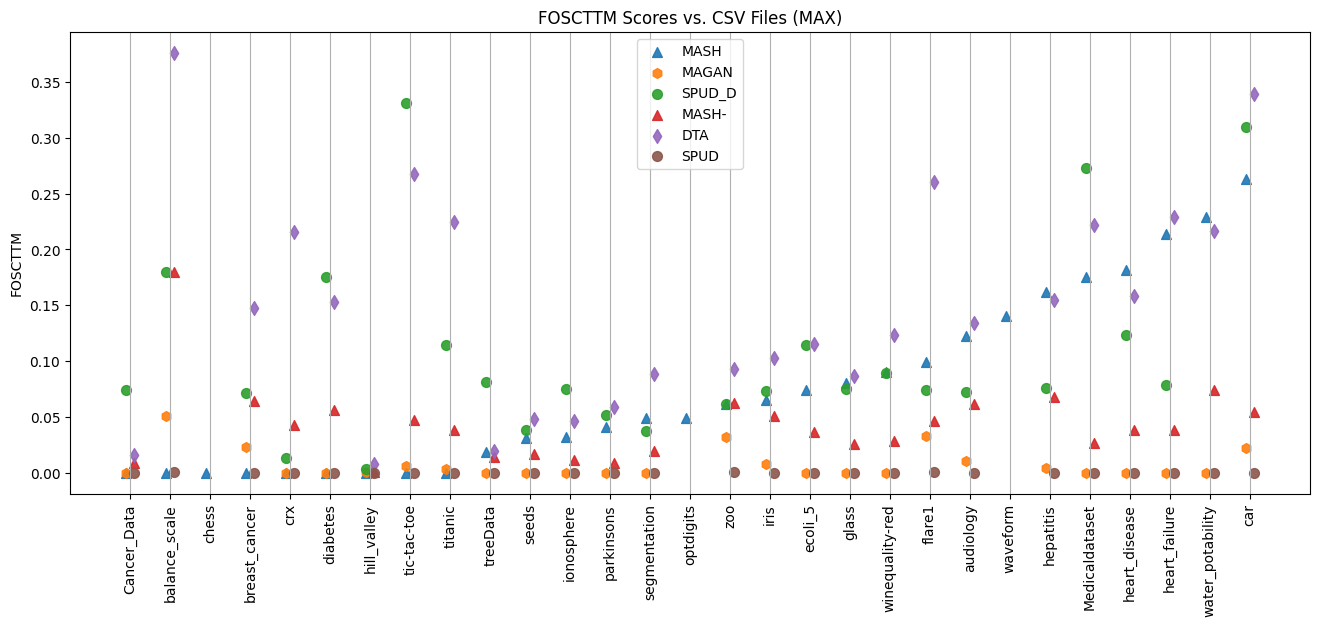

In [12]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "FOSCTTM", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG"])

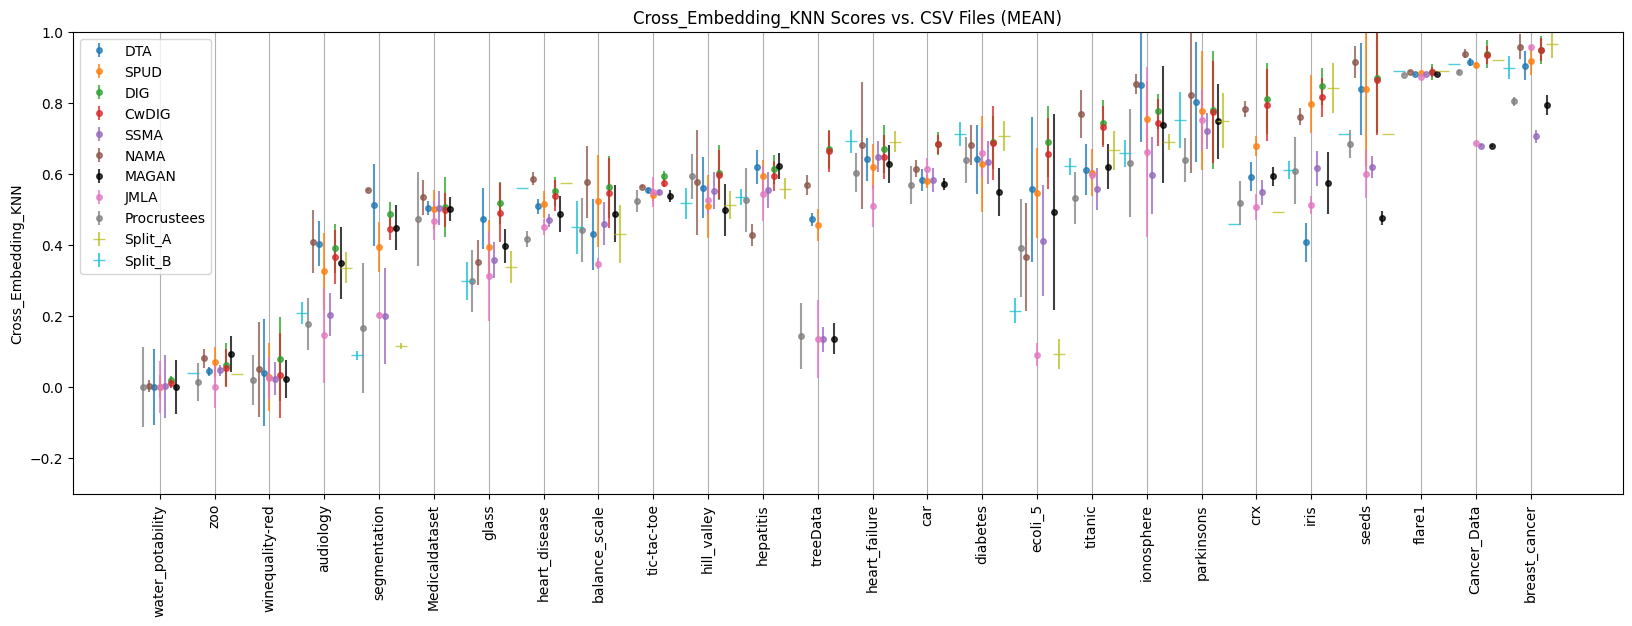

In [13]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [14]:
def get_ranks(show_more = False, **kwargs):
    #The amount of comparisions
    NUM = 10

    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    csv_df = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()
    df_ranked = csv_df.rank(ascending=False, method='max', axis = 1)

    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Get the csv file with Cross embedding as the max
    csv_df2 = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").dropna()
    d1 = len(csv_df2)
    columns = csv_df2.columns[1:-2]

    #Add their Overall value
    print(f"\n  Combined Metric Scores\n------------------------------------------------------------------------------")
    print(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    #Drop the SPlits from the df
    methods_df = csv_df2.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df2.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values and print their rank underneath
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df2["csv_file"]))



In [15]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks(show_more = True)

Ranked across No Split
-----------------------
DIG       2.964286
DTA       3.178571
CwDIG     4.607143
SPUD_D    5.000000
PCR       5.285714
JLMA      5.785714
NAMA      5.964286
SPUD      6.250000
SSMA      7.535714
MAGAN     8.535714
dtype: float64

 
STD of Ranks across No Split
----------------------------
DIG       1.502643
MAGAN     1.815206
CwDIG     1.931019
SPUD_D    1.962614
NAMA      2.027261
SSMA      2.284929
SPUD      2.661453
JLMA      3.010563
PCR       3.065424
DTA       3.067797
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA       15
PCR        4
DIG        4
SPUD       2
JLMA       1
CwDIG      1
SPUD_D     1
Name: count, dtype: int64

  Combined Metric Scores
------------------------------------------------------------------------------
      SSMA      MAGAN       DTA    SPUD_D      SPUD       DIG     CwDIG  \
0  0.72767   0.715426  0.798255  0.797529  0.776757  0.819844  0.807799   
0  9.00

### Simple Ranking

In [16]:
def get_mean_std_df(split = "all", scoring = "Combined_Metric", **kwargs):
    #Sort by Split

    #Add the values of all the dfs together
    if split == "all":
        #Create the base set
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = "turn", **kwargs), metric = scoring, return_df=True)

        for s_type in ["distort", "even", "skewed", "random"]:
            #Add each of the sets to the dataframe
            split_df = split_df._append(plt_methods_by_CSV_max(df = subset_df(df=df, split = s_type, **kwargs), metric = scoring, return_df=True))

    else:
        #Create the df 
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = split, **kwargs), metric = scoring, return_df=True)

    #Drop unneeded columns
    csv_df = split_df.drop(columns= ["SPUD_D", "csv_file", "Split_A", "Split_B"]).dropna()

    #Create csv df
    csv_df_std = pd.DataFrame(np.reshape(np.std(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = csv_df.columns)
    csv_df = csv_df_std._append((pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = csv_df.columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,9)), columns = csv_df.columns).rank(ascending=False, method='max', axis = 1))).reset_index().sort_values(by = 0, ascending = False, axis=1).drop(columns = ["index"]))


    #Rename the index
    csv_df.index = ["STD", "Mean", "rankings"]

    return csv_df

def plot_ranks(scoring = "Combined_Metric", **kwargs):

    #Create a dataframe to add too:
    agregate_df = get_mean_std_df(scoring = scoring, **kwargs).head(2)

    #Add all the other dfs
    for kind in ["random", "skewed", "even", "distort", "turn"]:
        agregate_df = agregate_df._append(get_mean_std_df(scoring = scoring, split = kind, **kwargs).head(2))
    
    #Reset index
    agregate_df.index = ["STD - all", "MEAN - all", "STD - random", "MEAN - random","STD - skewed", "MEAN - skewed","STD - even", "MEAN - even","STD - distort", "MEAN - distort","STD - turn", "MEAN - turn"]

    # Sort columns based on the 'MEAN - all' row
    sorted_columns = agregate_df.loc['MEAN - all'].sort_values(ascending = False).index
    agregate_df = agregate_df[sorted_columns]
    columns = agregate_df.columns
    x = np.array(range(len(columns))) / 15
    
    # Plotting
    plt.figure(figsize=(14, 8))

    legend = True

    
    # Define the colorblind-friendly colors
    colors = ['#000000', '#e41a1c', '#377eb8', 
              '#4daf4a', '#984ea3', '#ff7f00', 
              '#a65628', '#f781bf', '#999999']
    
    for i in range(0, len(agregate_df), 2):
        std_values = agregate_df.iloc[i].values
        mean_values = agregate_df.iloc[i+1].values

        for pos, mean, std, label, c in zip(x, mean_values, std_values, columns, colors):
            
            #change the format
            if pos < x[3]:
                fmt = 'o'
            else:
                fmt = "^"

            #Rename DIG to MAD
            if label == "DIG":
                label = "MASH-"
            elif label == 'CwDIG':
                label = "MASH"
            elif label == 'PCR':
                label = "MAPA"

            plt.errorbar(pos - 0.3, mean, yerr=std, fmt=fmt, label=label, elinewidth= 2, color = c, ms = 10, capsize=5)

        if legend:
            plt.legend(fontsize = 16, loc = (0.635, 0.01))
            legend = False

        #Move the positions over
        x += 1
    
    
    plt.xticks(np.array(range(0,6)) - 0.04, ["all", "random", "skewed", "even", "distort", "rotation"], fontsize = 20, rotation=0)
    plt.yticks(fontsize=16)
    #plt.xlabel('Domain Adaptation Methods', fontsize=15)
    plt.ylabel('Combined Metric', fontsize=20)
    plt.title('Comparison of Results', fontsize=25)
    plt.grid(visible=True, axis = "y")
    plt.tight_layout()
    plt.show()
    

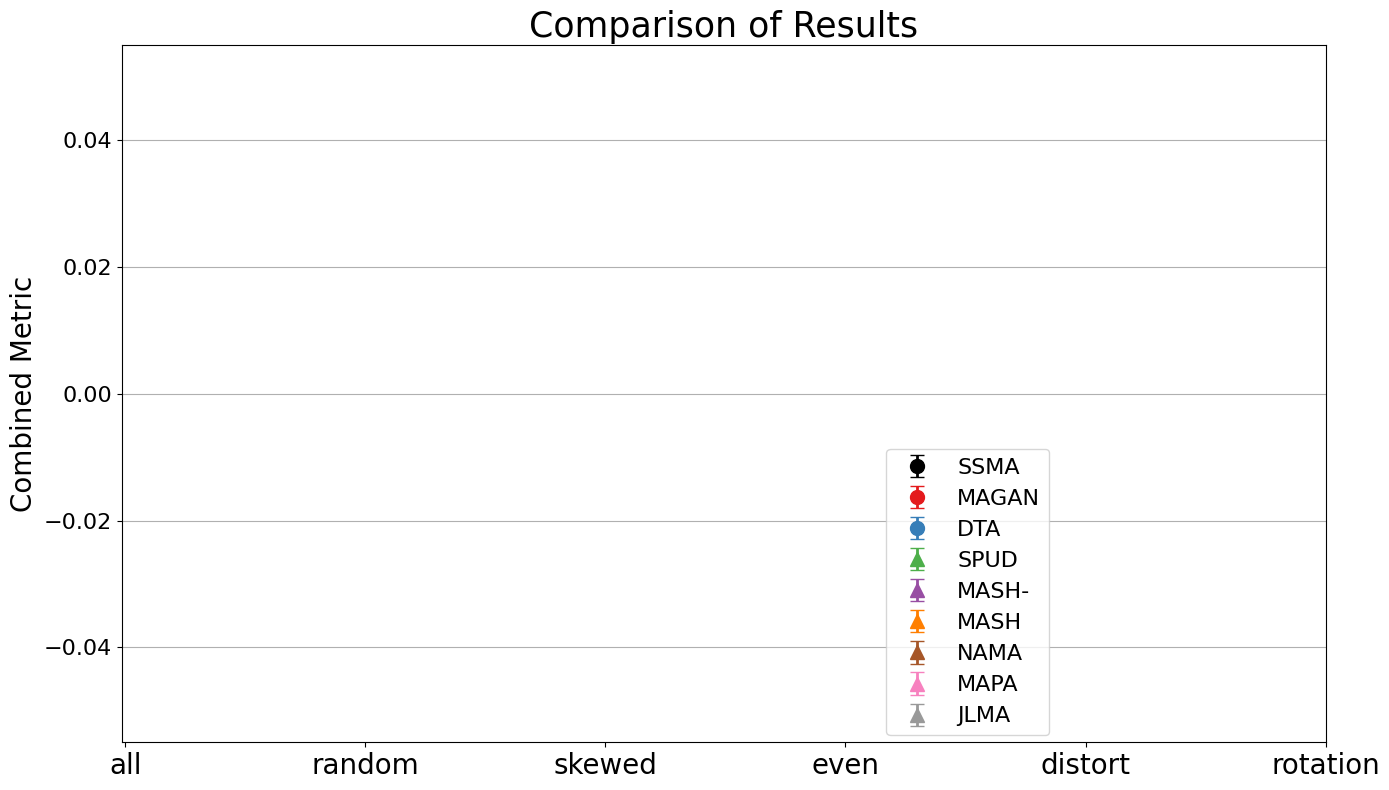

In [17]:
plot_ranks(Percent_of_Anchors = "0.2")

## Comparing Parameters across all methods

### Line Plots

In [18]:
def line_plot_methods(df_subset = df, argument = "Percent_of_Anchors", metric = "Combined_Metric", plt_legend = False, custom_title = False):
    "subset should equal none or the csv file name"

    #Create figure
    plt.figure(figsize=(14,7))

    # Group by 'csv_file' and 'argument' to get the max 'metric' for each file and argument
    SSMA = df_subset[df_subset["method"] == "SSMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    DIG = df_subset[df_subset["method"] == "DIG"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    CwDIG = df_subset[df_subset["method"] == "CwDIG"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    JLMA = df_subset[df_subset["method"] == "JLMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    MAGAN = df_subset[df_subset["method"] == "MAGAN"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    MAPA = df_subset[df_subset["method"] == "PCR"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    SPUD = df_subset[df_subset["SPUDS_Algorithm"] == "merge"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    DTA = df_subset[df_subset["method"] == "DTA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]


    #Keywords arguments
    line_styles = {"linewidth" : 3,
                   "linestyle" : '-'
                   }
    
    scatter_styles = {"s" : 100}



    #Plot the graphs
    plt.plot(SPUD.mean(), label = "SPUD", color = '#000000', **line_styles)
    plt.plot(CwDIG.mean(), label = "MASH", color ='#e41a1c', **line_styles)
    plt.plot(DIG.mean(), label = "MASH-", color =  '#377eb8', **line_styles)    
    plt.plot(DTA.mean(), label = "DTA", color = "#4daf4a", **line_styles)
    plt.plot(MAGAN.mean(), label = "MAGAN", color = "#984ea3", **line_styles)

    if argument != "Percent_of_KNN":
        NAMA = df_subset[df_subset["method"] == "NAMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
        plt.plot(NAMA.mean(), label = "NAMA", color = "#ff7f00", **line_styles)
        
    plt.plot(SSMA.mean(), label = "SSMA", color = "#a65628", **line_styles) #I want the max, and then the mean of the csvs    
    plt.plot(MAPA.mean(), label = "MAPA", color = "#f781bf", **line_styles )
    plt.plot(JLMA.mean(), label = "JLMA", color = "#999999", **line_styles)


    """#Scatter plot
    plt.errorbar(x = [0,1,2,3,4,5], y = SPUD.mean(), label = "SPUD", color = '#000000', yerr = SPUD.std()/2, **scatter_styles)
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.1/2, y =CwDIG.mean(), yerr = CwDIG.std()/2, label = "MASH", color ='#e41a1c', **scatter_styles)
    plt.errorbar(x = np.array([0,1,2,3,4,5]) - 0.1/2, y = DIG.mean(), yerr = DIG.std()/2, label = "MASH-", color =  '#377eb8', **scatter_styles)    
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.2/2, y = DTA.mean(),yerr = DTA.std()/2,  label = "DTA", color = "#4daf4a", **scatter_styles)
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.3/2, y = MAGAN.mean(),yerr = MAGAN.std()/2, label = "MAGAN", color = "#984ea3", **scatter_styles)

    if argument != "Percent_of_KNN":
        NAMA = df_subset[df_subset["method"] == "NAMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
        plt.errorbar(x = np.array([0,1,2,3,4,5]) -0.2/2, y = NAMA.mean(), yerr = NAMA.std()/2, label = "NAMA", color = "#ff7f00", **scatter_styles)
        
    plt.errorbar(x = np.array([0,1,2,3,4,5]) - 0.3/2, y = SSMA.mean(), yerr = SSMA.std()/2, label = "SSMA", color = "#a65628", **scatter_styles) #I want the max, and then the mean of the csvs    
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.4/2 , y = MAPA.mean(), yerr = MAPA.std()/2, label = "MAPA", color = "#f781bf", **scatter_styles )
    plt.errorbar(x = np.array([0,1,2,3,4,5]) - 0.4/2, y = JLMA.mean(), yerr = JLMA.std()/2, label = "JLMA", color = "#999999", **scatter_styles)

    """

    import seaborn as sns
    sns.scatterplot(CwDIG.mean(), color ='#e41a1c', **scatter_styles)
    sns.scatterplot(DIG.mean(), color =  '#377eb8', **scatter_styles)    
    sns.scatterplot(DTA.mean(),  color = "#4daf4a", **scatter_styles)
    sns.scatterplot(MAGAN.mean(), color = "#984ea3", **scatter_styles)

    if argument != "Percent_of_KNN":
        NAMA = df_subset[df_subset["method"] == "NAMA"].groupby(['csv_file', argument])[metric].max().reset_index()
        sns.scatterplot(NAMA.groupby(argument)[metric].mean(),  color = "#ff7f00", **scatter_styles)
        
    sns.scatterplot(SSMA.mean(), color = "#a65628", **scatter_styles) #I want the max, and then the mean of the csvs    
    sns.scatterplot(MAPA.mean(), color = "#f781bf", **scatter_styles )
    sns.scatterplot(JLMA.mean(), color = "#999999", **scatter_styles)



    #Make it pretty
    plt.xlabel(argument.replace('_', " "), fontsize = 20)
    plt.ylabel(metric.replace('_', " "), fontsize = 20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    if plt_legend != False:
        plt.legend(fontsize=16, loc = plt_legend, ncol = 3)

    if custom_title != False:
        plt.title(custom_title, fontsize = 25)

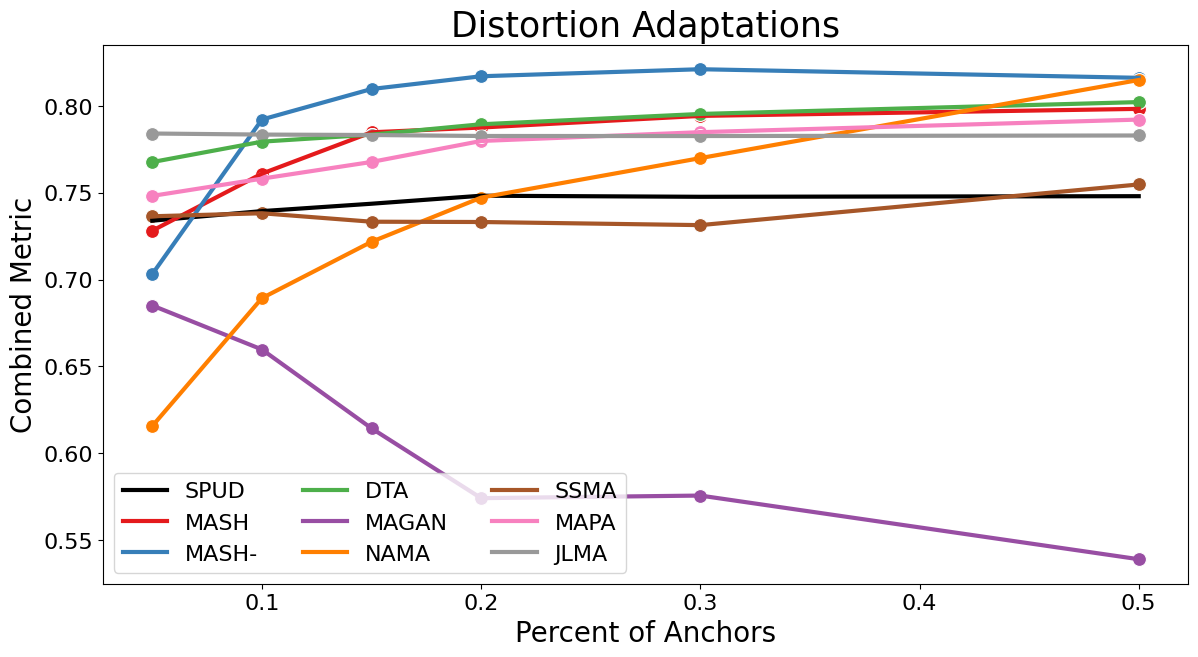

In [19]:
distort_turn = df[df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = distort_turn, metric = "Combined_Metric", custom_title="Distortion Adaptations", plt_legend = (0.01, 0.02))

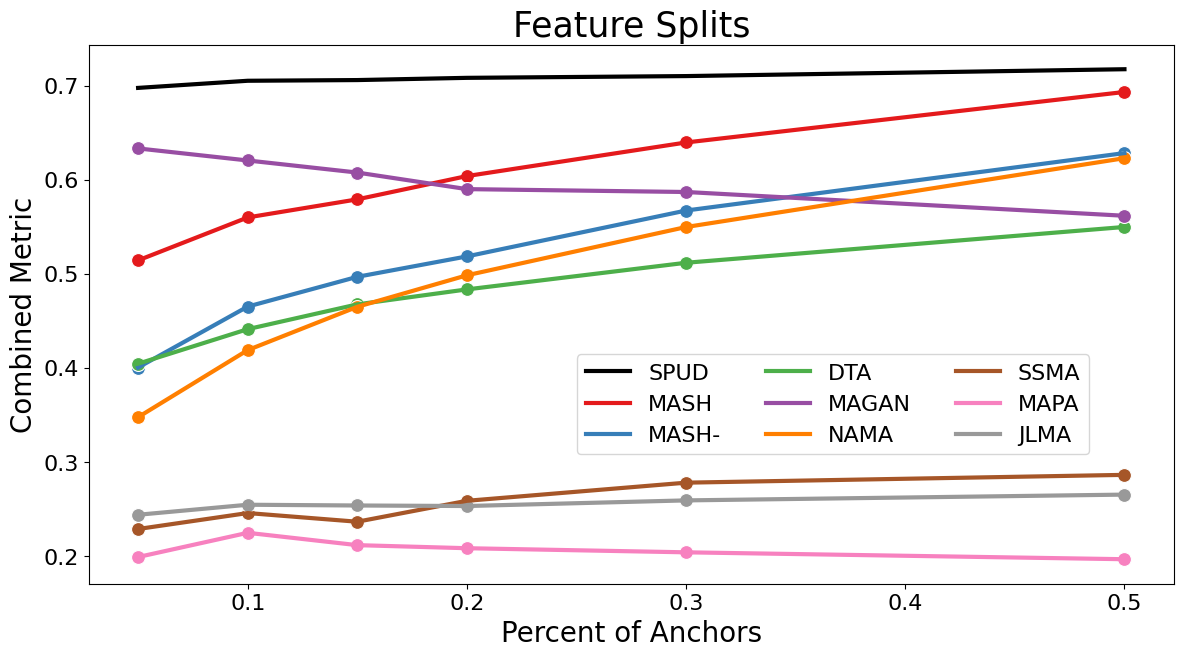

In [20]:
feature_splits = df[~df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = feature_splits, metric = "Combined_Metric", plt_legend = (0.45, 0.24), custom_title="Feature Splits")

### Sparse Data comparison

#### Set Up

In [21]:
from SPUD_Copy import SPUD_Copy
from DIG import DIG

In [22]:
sparse_dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)
sparse_dc.split_A = sparse_dc.split_A
sparse_dc.split_B = sparse_dc.split_B
#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (199, 3)
Split B Features shape (199, 4)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


#### Sparse DIG

In [31]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, DTM = "log", knn = 4)

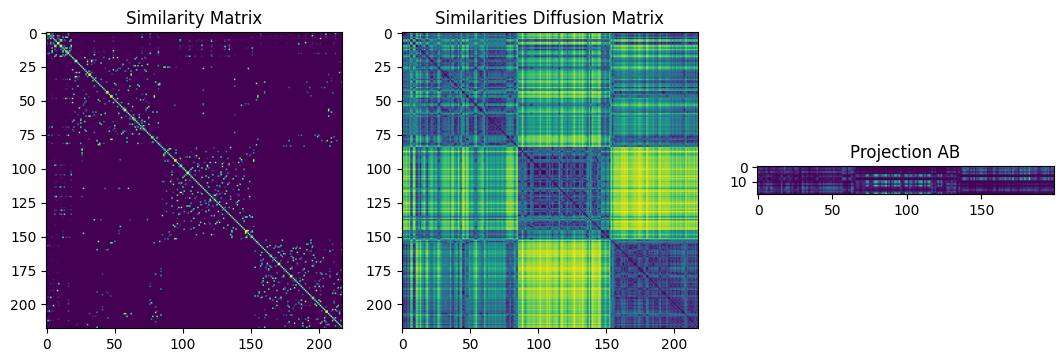

In [32]:
sparse_DIG.plot_graphs()

Model Stress: 91.00021307559541
Cross Embedding: 0.8391959798994975
Can't compute FOSCTTM with different domain shapes.


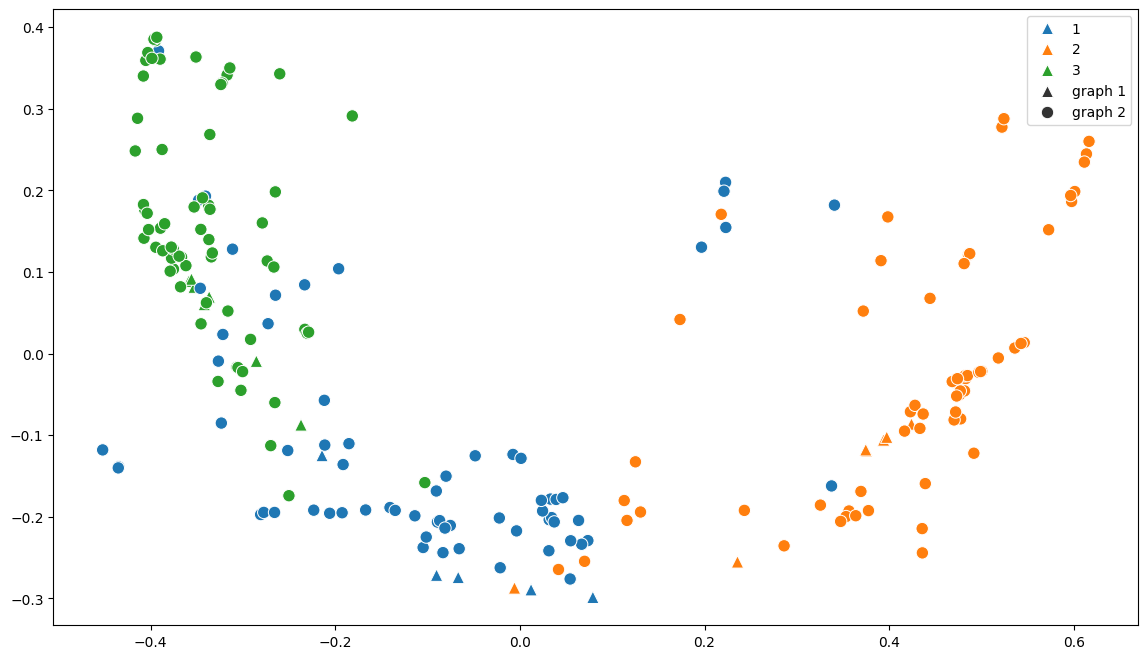

In [33]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

#### Sparse SPUD

In [34]:
sparse_spud = SPUD_Copy(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, operation = "sqrt", knn = 4)
#sparse_spud.plot_graphs()

Model Stress: 119.01061572536022
Cross Embedding: 0.8118222692409416
Can't compute FOSCTTM with different domain shapes.


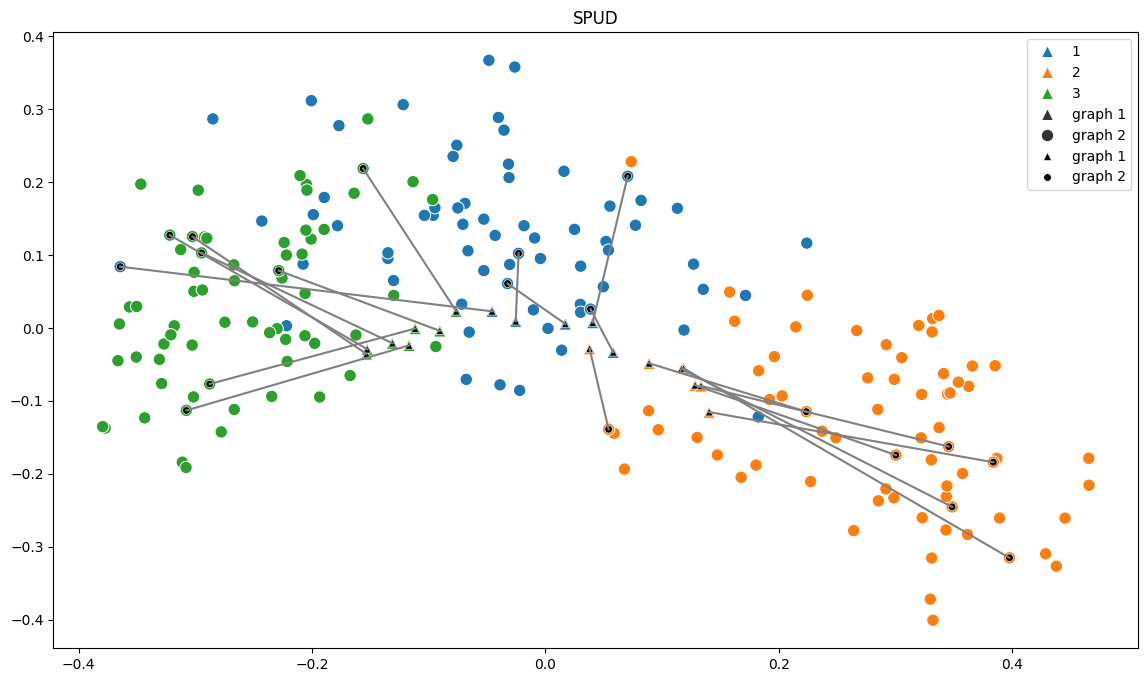

In [36]:

sparse_spud.plot_emb(sparse_labels, show_lines = False, show_anchors = True)

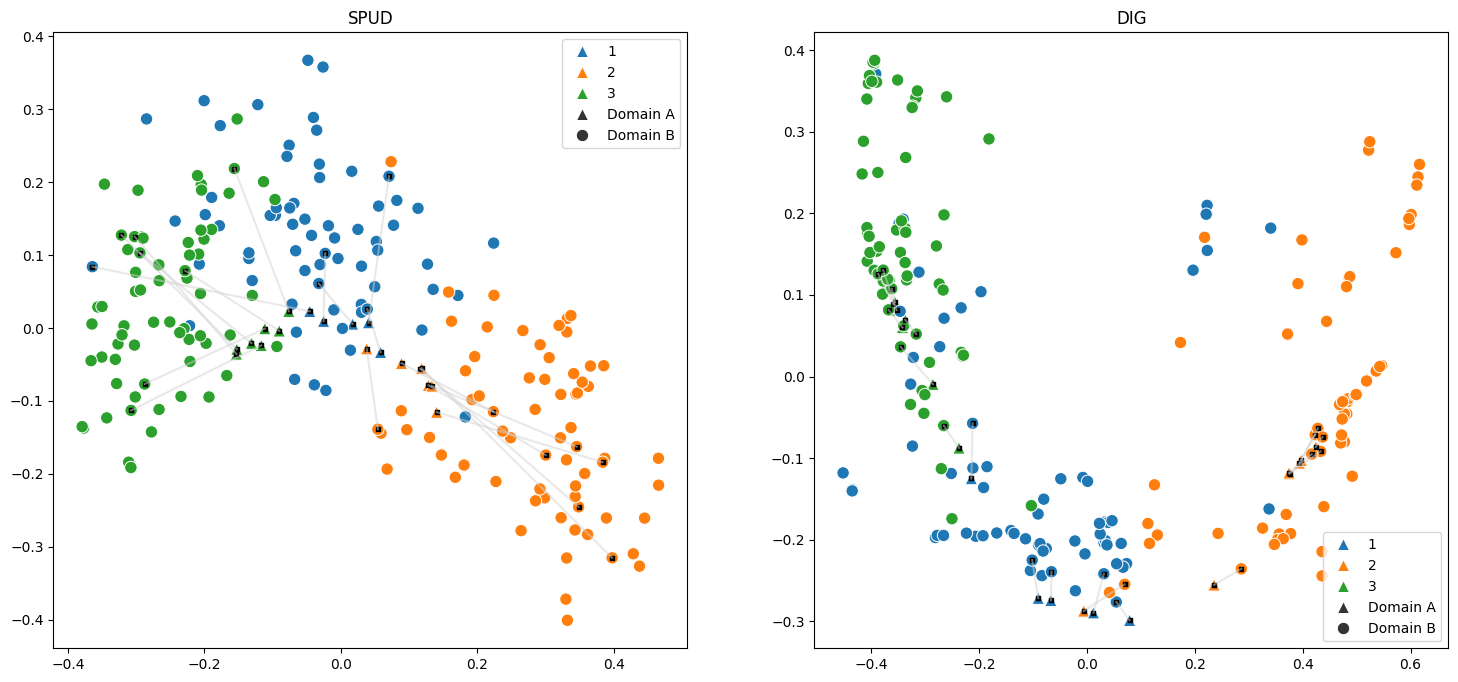

<Figure size 1400x800 with 0 Axes>

In [37]:
#Plot them side by side
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Set Title
axes[0].set_title("SPUD")
axes[1].set_title("DIG")

#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < sparse_spud.len_A else 'Domain B' for i in range(len(sparse_spud.emb[:]))]
plt.figure(figsize=(14, 8))

#Now plot the points
import seaborn as sns
sns.scatterplot(x = sparse_spud.emb[:, 0], y = sparse_spud.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[0])
sns.scatterplot(x = sparse_DIG.emb[:, 0], y = sparse_DIG.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[1])

#To plot line connections
for position, point in enumerate(random_points):
    axes[0].plot([sparse_spud.emb[position, 0], sparse_spud.emb[sparse_spud.len_A + point, 0]], [sparse_spud.emb[position, 1], sparse_spud.emb[sparse_spud.len_A + point, 1]], color = 'lightgrey', alpha = .5)
    axes[1].plot([sparse_DIG.emb[position, 0], sparse_DIG.emb[sparse_DIG.len_A + point, 0]], [sparse_DIG.emb[position, 1], sparse_DIG.emb[sparse_DIG.len_A + point, 1]], color = 'lightgrey', alpha = .5)

#Put black dots on the Anchors
axes[0].scatter(sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")
axes[1].scatter(sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")


#Show plot
plt.show()

## Label Prediction Visualization

In [39]:
dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "distort", percent_of_anchors= [0.8], verbose=2, random_state=42)


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (199, 7)
Split B Features shape (199, 7)
MDS initialized with 7 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


Cross Embedding: 0.864321608040201
Can't compute FOSCTTM with different domain shapes.


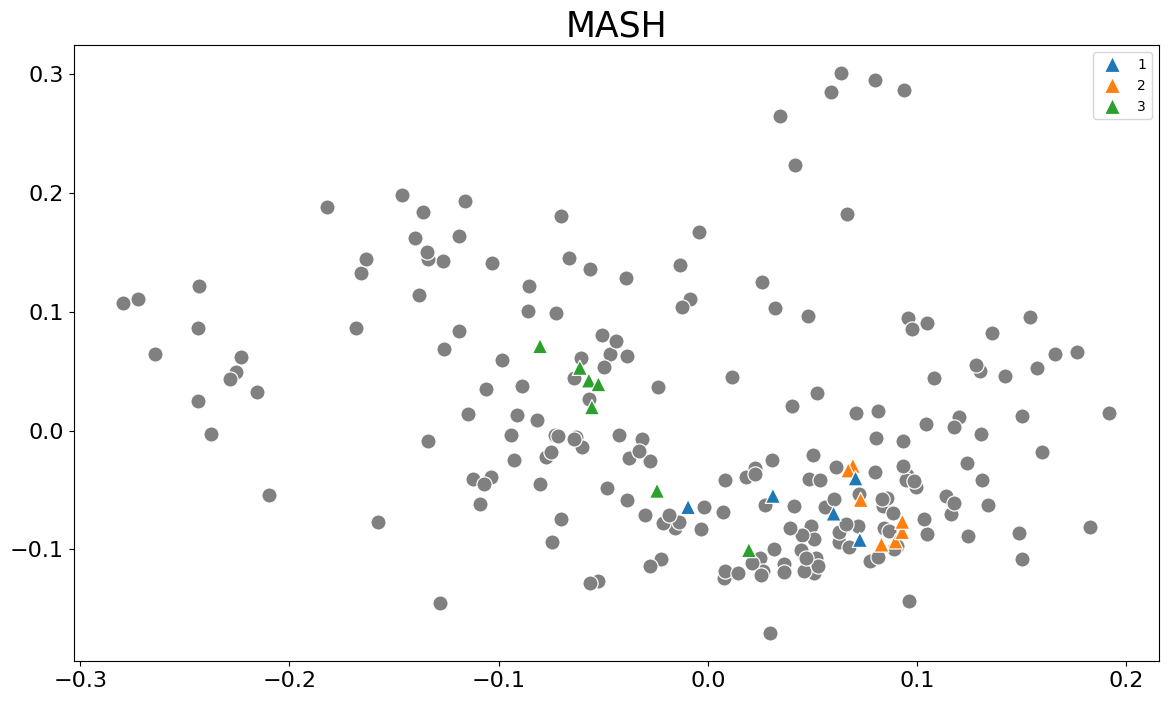

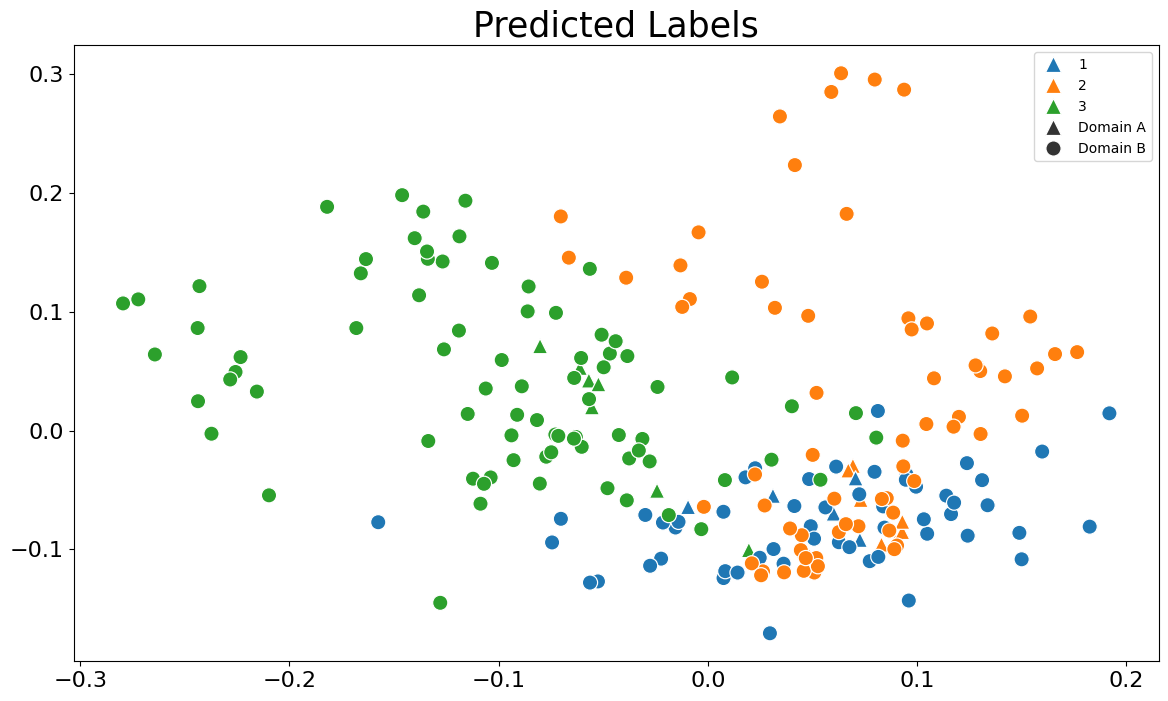

In [43]:
from MASH import MASH
LPD = MASH()
LPD.fit(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors)
LPD.plot_emb(sparse_labels, show_lines = False, show_anchors = False, show_pred = True, n_comp = 7) #Gets the embedding we can use

## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [44]:
visual_test = tma.test_manifold_algorithms(csv_file="ecoli_5.csv", split= "even", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with ecoli_5.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (327, 4)
Split B Features shape (327, 3)
MDS initialized with 3 components
The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 2 and 32, 6 and 82, 26 and 66, 31 and 80, 31 and 90, 33 and 127, 38 and 291, 80 and 90. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 25 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 40 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 66 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings

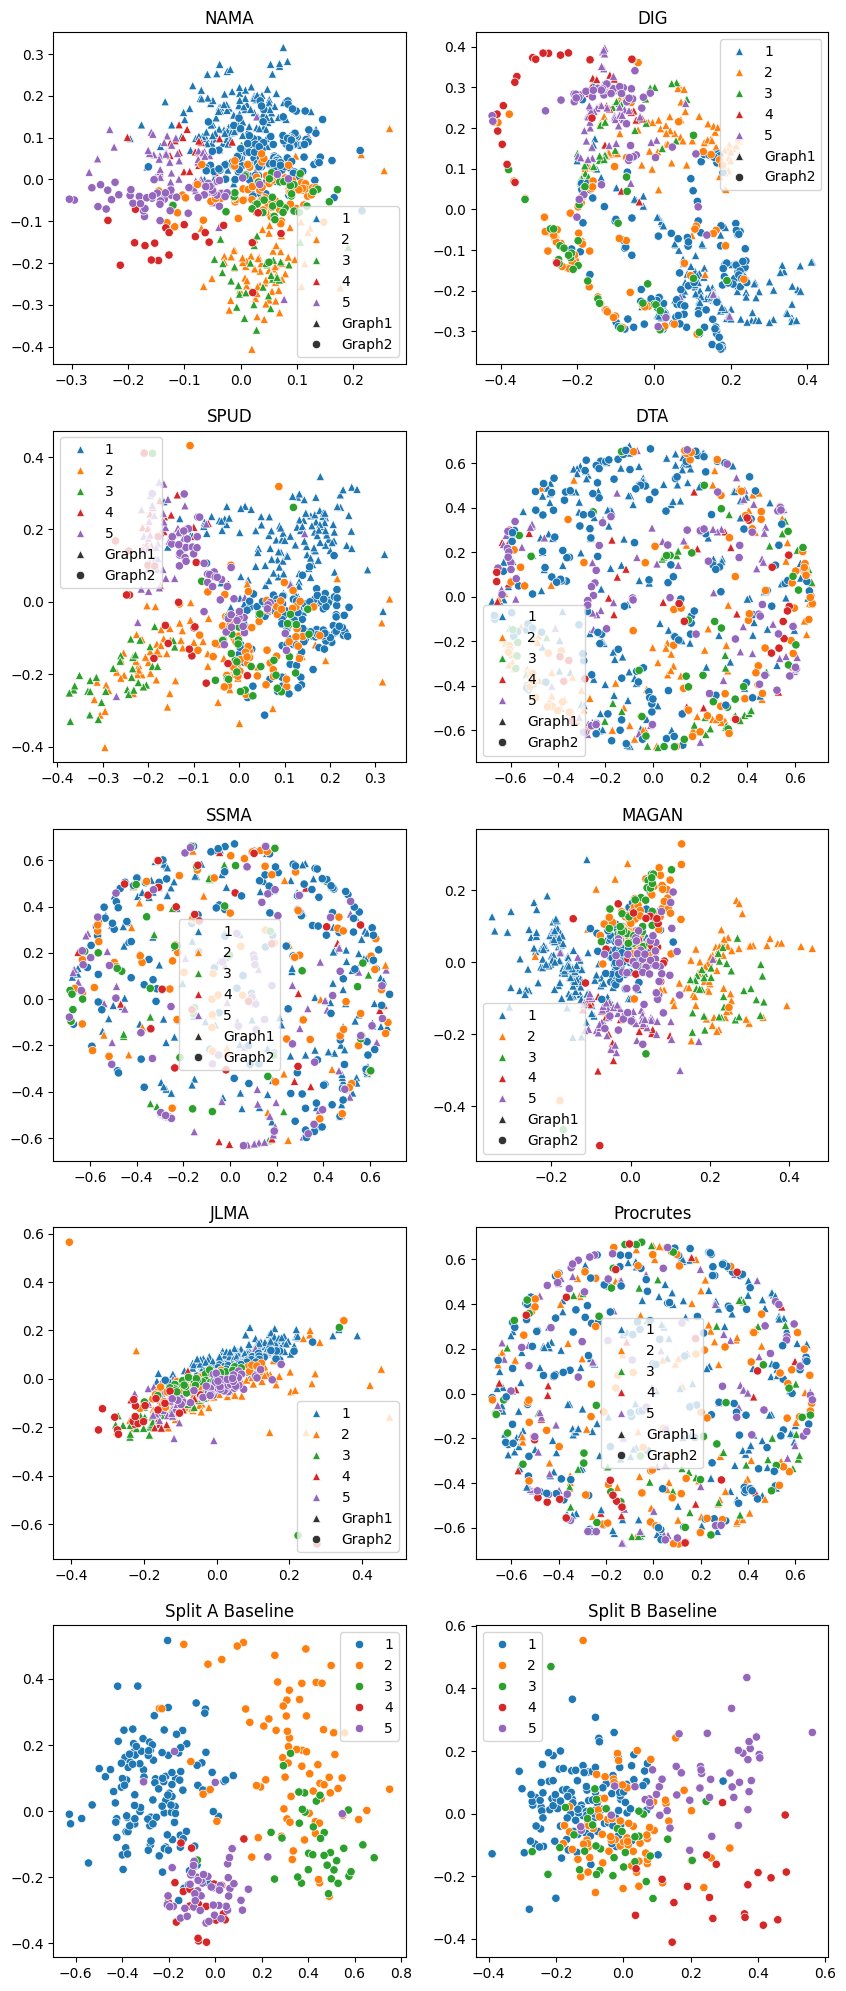

In [45]:
visual_test.plot_embeddings(knn = 5)

# Time Comparisions Below

In [46]:
"""#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df2 = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df2)

    #Count Instances
    instance_dict[csv_file] = len(df2.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df2) * len(df2.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T"""

'#Print the complexity of CSV files and the time it takes\ntime_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)\n\n#Add the amount of features for each csv file\nfor csv_file in time_df.columns:\n\n    #Continue the loop if the header is Methods\n    if csv_file == "Methods":\n\n        #Create dictionaries to store feature count and instance count\n        feature_dict = {"Methods" : 0}\n        instance_dict = {"Methods" : "Feature Count"}\n        complexity_dict = {"Methods" : "Complexity"}\n\n        continue\n\n    #Calulate the spcial cases\n    elif csv_file == "S-curve":\n        #Count Features\n        feature_dict[csv_file] = 600\n\n        #Count Instances\n        instance_dict[csv_file] = 3\n        complexity_dict[csv_file] = 1800\n\n        continue\n\n    #Calulate the spcial cases\n    elif csv_file == "blobs":\n        #Count Features\n        feature_dict[csv_file] = 300\n\n        #Count 

# Parameter Adjustment Heat map

In [47]:
import seaborn as sns
df["Percent_of_KNN"] = df["Percent_of_KNN"].round(2)

def plot_param_heat_map(parameters, method, metric = "Combined_Metric", figsize=(18, 10)):
    """ Parameters formated like ['Percent_of_KNN', 'Percent_of_Anchors']
        Metric formated like "Combined_Metric"
        Method formated like "Spud"
    """

    #Subset the data to only things we want
    df_params = subset_df(df = df, method = method)[parameters + [metric]].dropna()

    # Melt the dataframe to long format for seaborn
    df_melted = df_params.melt(id_vars=parameters, value_vars=[metric]).drop_duplicates()

    # Group by parameters and calculate the mean of 'value'
    df_mean = df_melted.groupby(parameters)['value'].mean().reset_index()

    #Create the figure
    plt.figure(figsize=figsize)

    #Create pivot table we can plot
    if len(parameters) > 3:
        df_pivot = df_mean.pivot_table(index=parameters[:2], columns=parameters[2:], values = ["value"])
        index_levels = len(df_pivot.index.levels[0]) 
    else:
        df_pivot = df_mean.pivot_table(index=parameters[:1], columns=parameters[1:], values = ["value"])
        index_levels = 0.8


    df_pivot.fillna(0, inplace = True)

    # Create the heatmap
    ax = sns.heatmap(df_pivot, annot=True, cmap='viridis')

    #Make it pretty
    plt.title(f'{method}\'s Parameter Heatmap Colored by {metric.replace("_", " ")}', fontsize = 20)
    plt.xlabel("")
    plt.ylabel("")

    if len(parameters) > 2:
        # Special art if we have multiple categories
        num_headings = len(set([index[-1] for index in df_pivot.columns]))

        #Customize x-ticks labels
        ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5)
        ax.set_xticklabels([label for label in df_pivot.columns.get_level_values(2)], rotation=90, fontsize = 13)

        # Draw a vertical black line every x columns if we have multiple categories
        for i in range(0, df_pivot.shape[1] + 1, num_headings):
            plt.axvline(x=i, color='black', linewidth = 5)

        # Add the second level of labels
        for i in range(0, df_pivot.shape[1], num_headings):
            ax.text(i + (num_headings * 0.5), (figsize[1] * index_levels)+3, df_pivot.columns.get_level_values(1)[i], ha='center', va='center', fontsize=18, rotation=0)


    if len(parameters) > 3:

        # Special art if we have four categories
        num_headings = len(set([index[-1] for index in df_pivot.index]))


        #Customize x-ticks labels
        ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5)
        ax.set_yticklabels([label for label in df_pivot.index.get_level_values(1)], rotation=0, fontsize = 13)

        # Draw a vertical black line every x columns if we have multiple categories
        for i in range(0, df_pivot.shape[0] + 1, num_headings):
            plt.axhline(y=i, color='black', linewidth = 5)

        # Add the second level of labels
        for i in range(0, df_pivot.shape[0], num_headings):
            ax.text(-4, i + (num_headings * 0.5), df_pivot.index.get_level_values(0)[i], ha='center', va='center', fontsize=18, rotation=90)

    else:
        plt.ylabel(parameters[0].replace("_", " "), fontsize = 20)
        plt.yticks(fontsize = 13)


    plt.show()
    


## Mash

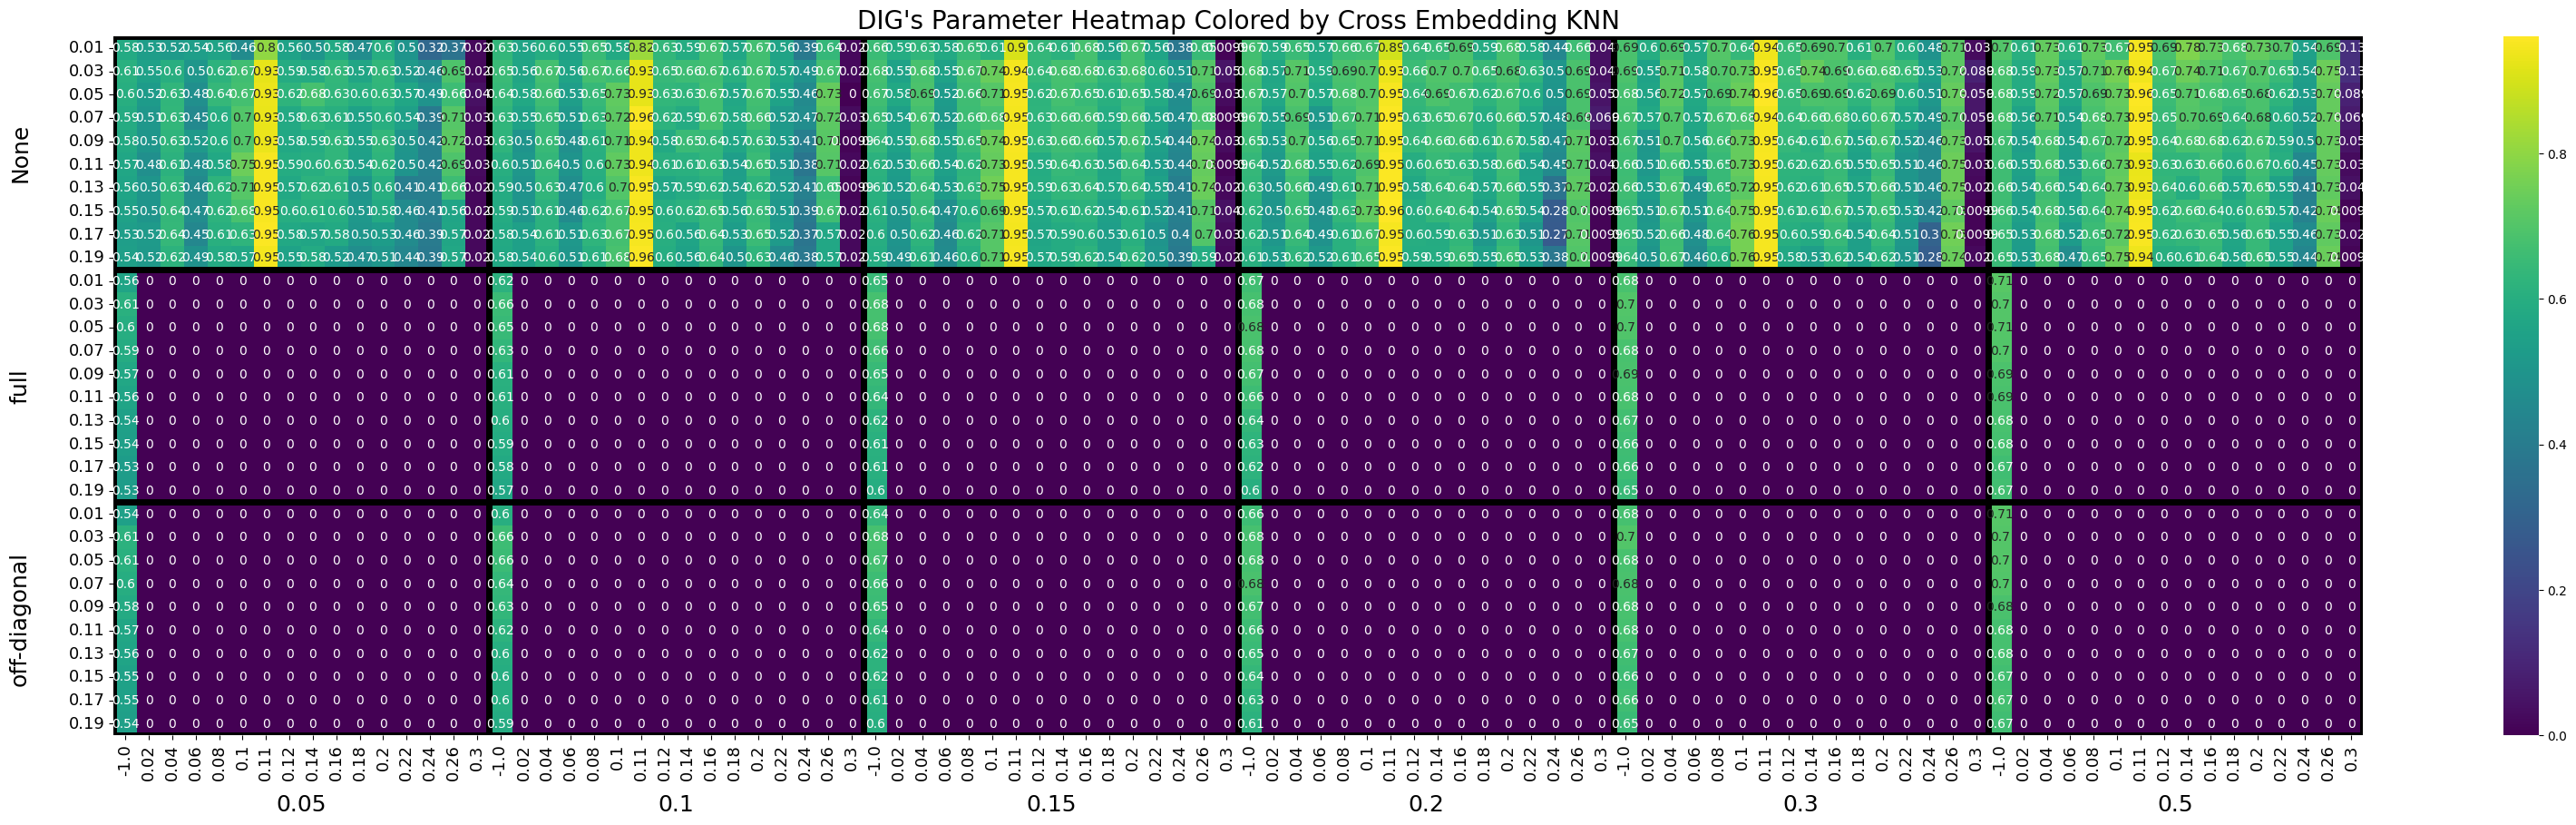

In [48]:
plot_param_heat_map([ "Page_Rank", 'Percent_of_KNN', "Percent_of_Anchors", "t_value"], "DIG", metric = "Cross_Embedding_KNN", figsize = (40, 10))

## SPUD

In [49]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 't_value', 'Predicted_Feature_MAE',
       'Operation', 'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

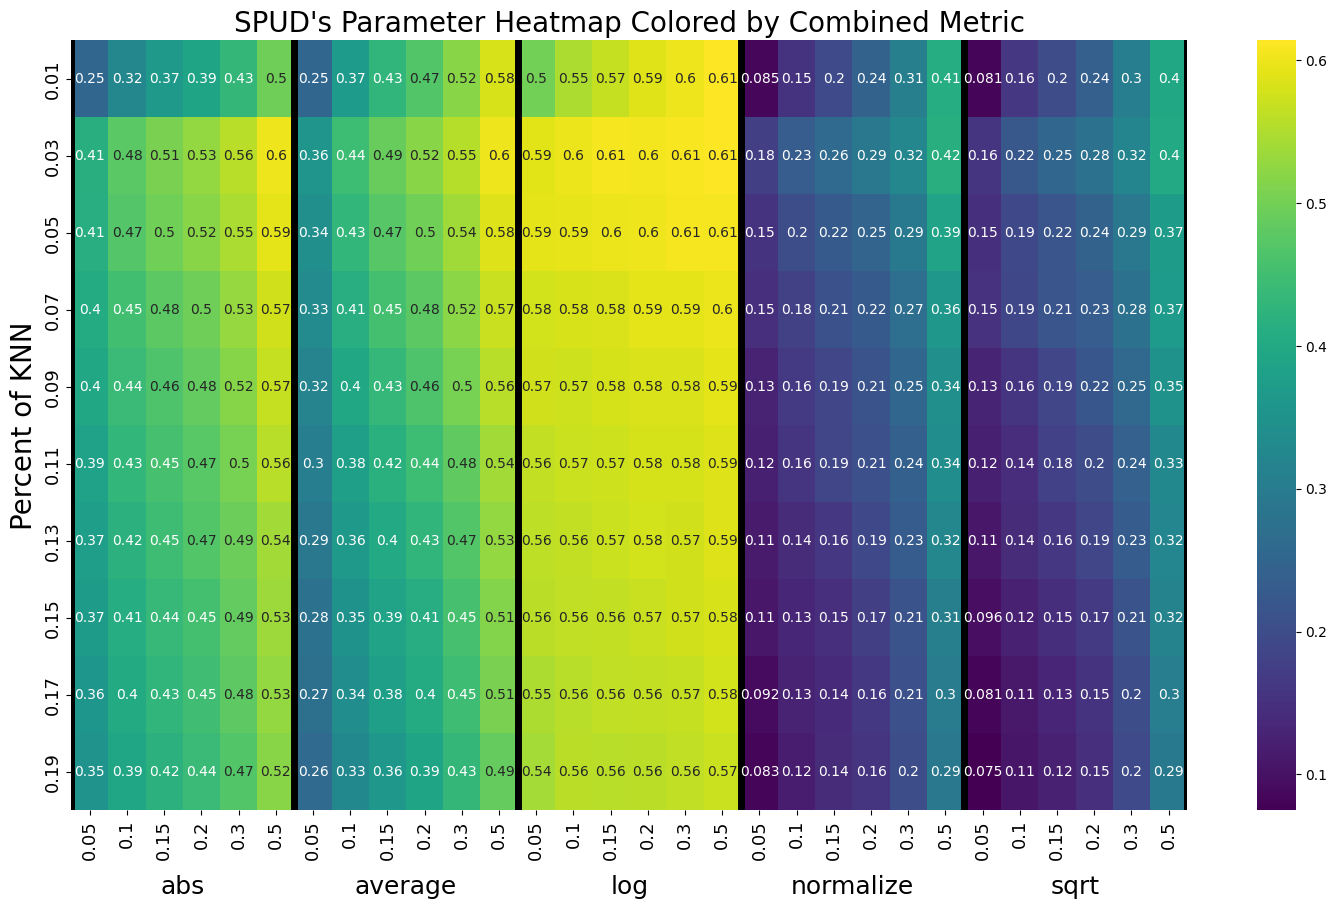

In [50]:
plot_param_heat_map(["Percent_of_KNN", "Operation", 'Percent_of_Anchors'], "SPUD" , figsize=(18, 10))

In [51]:
subset_df(df, method = "SPUD", Percent_of_Anchors = "0.2", Operation = "normalize")

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,t_value,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
